In [1]:
import cvae

In [2]:
from cvae import cvae

In [3]:
from umap import UMAP

In [4]:
# from sklearn.datasets import fetch_openml
# mnist = fetch_openml('mnist_784', version=1, cache=True)
# X = mnist.data

In [5]:
import csv
import numpy as np

name = 'StandardVAETest0'
with open('outputs/'+name+'/sample_latent_vectors'+name+'.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    data = list(csv_reader)
    data = data[1:]
    latent = [list(map(float,item[0].replace('[','').replace(']','').strip(' ').split(','))) for item in data]
    target = [int(item[1])for item in data]

In [6]:
# print(latent[0])
# print(target)
latent=np.array([np.array(i) for i in latent])
#latent=np.array(latent)
#print(latent[0:2])

In [7]:
#initialise
embedder = cvae.CompressionVAE(latent)

Total amount of data:  540
Input feature dimension:  128
Calculating normalisation factors.
Normalisation factors calculated.
Total amount of data:  60
Creating model.
Model created.
Setting up loss.
Loss set up.
Setting up session.
Session set up.
Trying to restore saved checkpoints from C:\Users\ljp1\Documents\MSci\Code\ConditionalVAE\temp ... No checkpoint found.
No model found to restore. Initialising new model.


In [8]:
#fit
embedder.train()

Starting queues.
Reader threads started.
step 0; epoch 0.00 - loss = 64.532, test_loss = 60.208, lr = 0.00100, (0.008 sec/step)
Storing checkpoint to C:\Users\ljp1\Documents\MSci\Code\ConditionalVAE\temp ... Done.
step 50; epoch 5.93 - loss = 59.300, test_loss = 58.490, lr = 0.00100, (0.000 sec/step)
step 100; epoch 11.85 - loss = 74.727, test_loss = 58.235, lr = 0.00100, (0.000 sec/step)
step 150; epoch 17.78 - loss = 59.641, test_loss = 57.380, lr = 0.00100, (0.000 sec/step)
step 200; epoch 23.70 - loss = 55.736, test_loss = 56.656, lr = 0.00100, (0.000 sec/step)
step 250; epoch 29.63 - loss = 58.299, test_loss = 54.188, lr = 0.00100, (0.000 sec/step)
step 300; epoch 35.56 - loss = 70.850, test_loss = 53.031, lr = 0.00100, (0.000 sec/step)
step 350; epoch 41.48 - loss = 56.888, test_loss = 51.705, lr = 0.00100, (0.000 sec/step)
step 400; epoch 47.41 - loss = 47.038, test_loss = 49.775, lr = 0.00100, (0.000 sec/step)
step 450; epoch 53.33 - loss = 56.110, test_loss = 48.725, lr = 0.00

In [9]:
#embed
z = embedder.embed(latent)

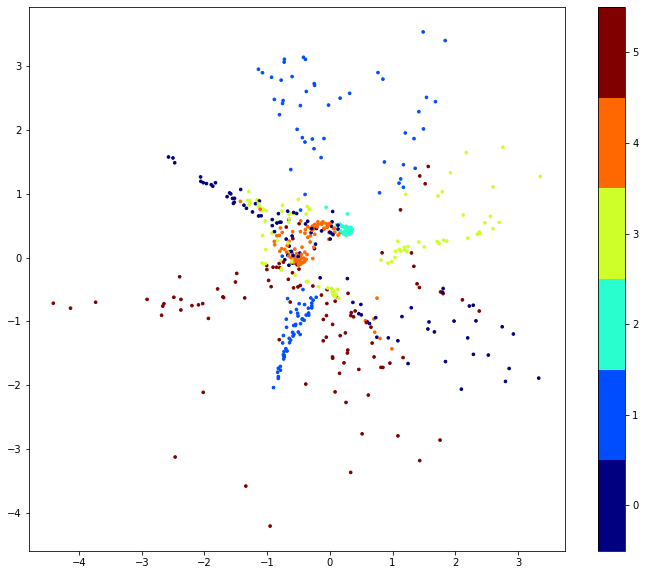

In [10]:
#visualise
embedder.visualize(z, labels=[int(label) for label in target])


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import umap
%matplotlib inline

In [13]:
fit = umap.UMAP()
%time u = fit.fit_transform(latent)

Wall time: 4.16 s


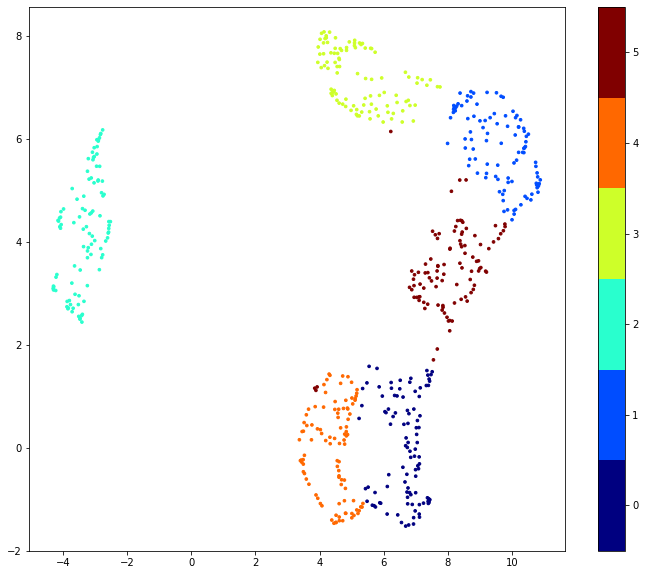

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10), facecolor='w', edgecolor='k')

cmap = plt.get_cmap('jet', np.max(target) - np.min(target) + 1)
s = ax.scatter(u[:, 0], u[:, 1], s=7, c=target, cmap=cmap, vmin=np.min(target) - .5,
                   vmax=np.max(target) + .5)
cax = plt.colorbar(s, ticks=np.arange(np.min(target), np.max(target) + 1))

In [16]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(latent);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=data)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=data)
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], c=target, s=100)
    plt.title(title, fontsize=18)

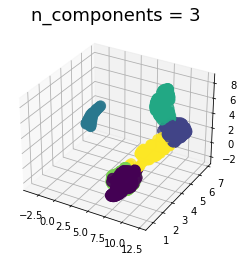

In [17]:
draw_umap(n_components=3, title='n_components = 3')


In [12]:
# sns.set(style='white', rc={'figure.figsize':(14,14)})
# sns.color_palette("tab10", as_cmap=True)

In [15]:
# cmap = mpl.cm.tab10
# bounds = [0, 1, 2, 3, 4, 5]
# norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

# # plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), orientation='horizontal',
# #              label="Discrete intervals with extend='both' keyword")

# plt.scatter(u[:,0], u[:,1], c=target, s=2, cmap=cmap)

# plt.colorbar()